In [52]:
using Pkg

# Lista de paquetes
pkgs = [
    "CSV",
    "Distributions",
    "DataFrames",
    "Dates",
    "Plots",
    "Random",
    "LinearAlgebra",
    "LaTeXStrings",
    "Lasso",
    "Statistics",
    "GLMNet",
    "MLJ"
]

# Instalar solo los que falten
for pkg in pkgs
    if !haskey(Pkg.project().dependencies, pkg)
        Pkg.add(pkg)
    end
end

# Activar todos
for pkg in pkgs
    @eval using $(Symbol(pkg))
end



   Resolving package versions...
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [ade2ca70] + Dates v1.11.0
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [9a3f8284] + Random v1.11.0
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [37e2e46d] + LinearAlgebra v1.11.0
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [b964fa9f] + LaT

In [53]:
using Pkg
using CSV
using Distributions
using DataFrames
using Dates
using Plots
using Random
using LinearAlgebra
using LaTeXStrings
using Lasso
# using MLBase
using Statistics
using GLMNet
using MLJ
using StatsModels
using StatsBase
using Plots


In [43]:
using CSV, DataFrames, GLMNet, Distributions, StatsBase, Plots, StatsModels


## 1. A simulation exercise in regularization framework: sparsity in population coefficients

## 2. A Simple Case Study using Wage Data from 2015

### Data

We consider data from the U.S. March Supplement of the Current Population Survey (CPS) in 2015.
The preproccessed sample consists of $5150$ never-married individuals.

In [15]:
import Pkg
Pkg.add("XLSX")
Pkg.add("Tables")   # también es útil para convertir a DataFrame


   Resolving package versions...
   Installed ZipFile ──────── v0.10.1
   Installed XML2_jll ─────── v2.14.4+0
   Installed ArgCheck ─────── v2.5.0
   Installed InputBuffers ─── v1.1.1
   Installed CodecInflate64 ─ v0.1.3
   Installed EzXML ────────── v1.2.2
   Installed ZipArchives ──── v2.5.1
   Installed XLSX ─────────── v0.10.4
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [fdbf4ff8] + XLSX v0.10.4
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
  [dce04be8] + ArgCheck v2.5.0
  [6309b1aa] + CodecInflate64 v0.1.3
  [8f5d6c58] + EzXML v1.2.2
  [0c81fc1b] + InputBuffers v1.1.1
  [fdbf4ff8] + XLSX v0.10.4
  [49080126] + ZipArchives v2.5.1
  [a5390f91] + ZipFile v0.10.1
  [02c8fc9c] + XML2_jll v2.14.4+0
Precompiling project...
   6181.0 ms  ✓ ArgCheck
   5327.2 ms  ✓ InputBuffers
   5286.1 ms  ✓ ZipFile
   5313.2 ms  ✓ CodecInflate64
   5151.6 ms  ✓ XML2_jll
   1665.7

In [28]:
Pkg.add("ExcelFiles")


   Resolving package versions...
   Installed TableTraitsUtils ─ v1.0.2
   Installed ExcelFiles ─────── v0.6.1
   Installed ExcelReaders ───── v0.11.0
   Installed TableShowUtils ─── v0.2.6
   Installed IterableTables ─── v1.0.0
   Installed PyCall ─────────── v1.96.4
   Installed FileIO ─────────── v1.17.0
   Installed DataValues ─────── v0.4.13
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
⌃ [89b67f3b] + ExcelFiles v0.6.1
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
  [8f4d0f93] + Conda v1.10.2
  [e7dc6d0d] + DataValues v0.4.13
⌃ [89b67f3b] + ExcelFiles v0.6.1
⌅ [c04bee98] + ExcelReaders v0.11.0
  [5789e2e9] + FileIO v1.17.0
  [1c8ee90f] + IterableTables v1.0.0
  [438e738f] + PyCall v1.96.4
  [5e66a065] + TableShowUtils v0.2.6
  [382cd787] + TableTraitsUtils v1.0.2
  [81def892] + VersionParsing v1.3.0
        Info Packages marked with ⌃ and ⌅ have new versions ava

In [ ]:
Pkg.add("DataTables")
Pkg.add("DataFrames")


   Resolving package versions...
   Installed DataTables ───── v0.1.0
   Installed ReadOnlyArrays ─ v0.1.1
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [743a1d0a] + DataTables v0.1.0
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
  [743a1d0a] + DataTables v0.1.0
⌅ [988b38a3] + ReadOnlyArrays v0.1.1
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
    900.8 ms  ✓ ReadOnlyArrays
    957.8 ms  ✓ DataTables
  2 dependencies successfully precompiled in 11 seconds. 241 already precompiled.
   Resolving package versions...
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`

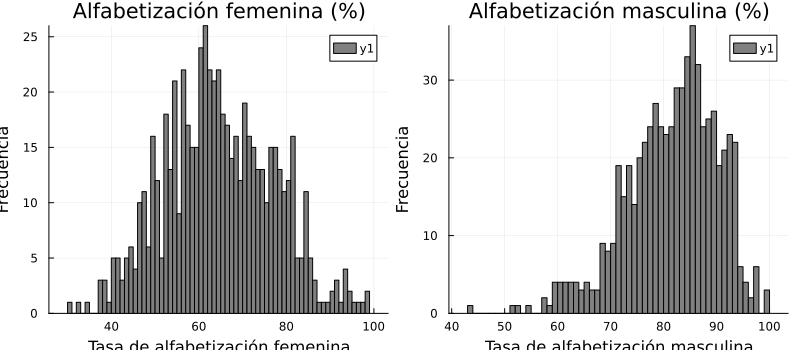

In [93]:
using Plots

# Crear subplot con 2 paneles
p1 = histogram(df.FEMALE_LIT, 
               bins=100, 
               color=:grey, 
               linecolor=:black,
               title="Alfabetización femenina (%)",
               xlabel="Tasa de alfabetización femenina",
               ylabel="Frecuencia")

p2 = histogram(df.MALE_LIT, 
               bins=100, 
               color=:grey, 
               linecolor=:black,
               title="Alfabetización masculina (%)",
               xlabel="Tasa de alfabetización masculina",
               ylabel="Frecuencia")

# Combinar los plots
plot(p1, p2, layout=(1,2), size=(800,350))

In [32]:
using XLSX, DataFrames, Tables

file = raw"C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Districtwise_literacy_rates.xlsx"

# Ver nombres de hojas
XLSX.openxlsx(file) do xf
    println("Hojas disponibles: ", XLSX.sheetnames(xf))
end

# Cargar directamente la hoja principal (usa el nombre exacto de tu hoja)
df = DataFrame(Tables.columntable(XLSX.readtable(file, "2015_16_Districtwise")))
first(df, 5)


Hojas disponibles: ["2015_16_Districtwise", "Metadata"]


Row,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOTP,SCH1GR,SCH2GR,SCH3GR,SCH4GR,SCH5GR,SCH6GR,SCH7GR,SCH9GR,SCHTOTGR,SCH1PR,SCH2PR,SCH3PR,SCH4PR,SCH5PR,SCH6PR,SCH7PR,SCH9PR,SELE1,SELE2,SELE3,SELE4,SELE5,SELE6,SELE7,SCOMP1,SCOMP2,SCOMP3,SCOMP4,SCOMP5,SCOMP6,SCOMP7,ENR501,ENR502,ENR503,ENR504,ENR505,ENR506,ENR507,ENR509,CLS1,CLS2,CLS3,CLS4,CLS5,CLS6,CLS7,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564,11.33,1.97002e5,34.62,843,0.12,8.08,66.92,54.79,77.1,2379,135672,72701,1107,818,2,14,2,84,49,0,2076,980,697,1,14,2,49,49,0,1792,127,121,1,0,0,35,0,0,284,954,681,1,14,2,48,49,0,1749,117,114,0,0,0,23,0,0,44,69,2,8,1,40,25,23,92,1,1,1,39,16,933,237,1,13,1,8,27,43,3489,5315,27,62,23,852,239,2708,5205,43,70,28,1065,638
2,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503,17.19,1.61871e5,20.34,873,0.15,3.74,66.93,55.01,77.35,4243,117874,70952,1215,825,9,11,5,176,69,0,2310,1108,639,1,11,5,96,69,0,1929,107,186,8,0,0,80,0,0,381,1031,600,1,8,5,91,60,0,1796,98,160,4,0,0,58,0,0,278,330,9,7,5,132,57,24,123,7,0,4,85,26,1014,240,0,10,4,35,49,41,4127,5800,210,53,30,1665,360,2937,5873,236,60,105,2533,964
3,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751,98.73,1.55798e5,23.56,879,0.09,0.72,71.21,63.47,77.95,1979,113560,62397,258,417,36,2,0,263,9,0,985,203,209,1,2,0,65,9,0,489,55,208,35,0,0,198,0,0,496,18,6,0,0,0,6,0,0,30,4,14,0,0,0,1,0,0,96,212,36,0,0,253,8,38,209,36,0,0,213,2,227,161,3,2,0,38,7,30,817,3284,886,11,0,2873,40,828,3647,1159,14,0,4757,129
4,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753,11.74,1.50756e5,21.18,883,0.05,3.17,57.98,46.6,68.56,1361,118477,58838,755,537,10,10,1,98,57,0,1468,697,423,1,10,1,40,57,0,1229,56,114,9,0,0,58,0,0,237,678,411,0,10,1,40,54,0,1194,55,110,8,0,0,49,0,0,70,78,10,2,1,64,25,19,100,9,3,1,68,15,654,137,0,8,0,15,38,43,2290,3837,119,45,8,1035,325,1878,3892,250,68,19,1493,716
5,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060,13.8,97651.3,29.18,913,0.07,4.03,65,53.81,75.41,1086,64493,30166,532,339,4,14,2,94,43,0,1028,497,233,0,14,2,23,43,0,812,35,106,4,0,0,71,0,0,216,470,215,0,13,2,23,41,0,764,27,88,0,0,0,48,0,0,29,76,4,3,2,76,35,18,89,4,1,2,69,13,501,125,0,13,1,6,35,36,1688,2584,151,67,5,1101,209,1336,2682,113,90,38,1414,506


In [62]:
# Eliminar filas con valores faltantes
data = dropmissing(df)
# Convierte todas las columnas numéricas posibles a Float64
for c in names(data)
    if eltype(data[!, c]) <: Number || eltype(data[!, c]) <: Union{Missing, Number}
        data[!, c] = Float64.(data[!, c])
    end
end

In [63]:
y = data[:, "FEMALE_LIT"]
Z = select(data, Not([:FEMALE_LIT, :OVERALL_LI, :MALE_LIT]))
column_names = names(Z)


97-element Vector{String}:
 "STATCD"
 "DISTCD"
 "STATNAME"
 "DISTNAME"
 "DISTRICTS"
 "BLOCKS"
 "VILLAGES"
 "TOTPOPULAT"
 "P_URB_POP"
 "POPULATION_0_6"
 "GROWTHRATE"
 "SEXRATIO"
 "P_SC_POP"
 ⋮
 "CLS3"
 "CLS4"
 "CLS5"
 "CLS6"
 "CLS7"
 "TCH1"
 "TCH2"
 "TCH3"
 "TCH4"
 "TCH5"
 "TCH6"
 "TCH7"

The following figure shows the weekly wage distribution from the US survey data.

### Low dimensional specification (basic)

In [66]:
# Fórmula básica con tus 20 variables y target = FEMALE_LIT
basic_formula = @formula(FEMALE_LIT ~ 1 +
    TOTPOPULAT + P_URB_POP + GROWTHRATE + SEXRATIO + AREA_SQKM +
    SCHTOT + SCH1 + SCH6 + SCHTOTG + TOT_11_13_15 +
    SCOMP5 + SCH1GR + SCH6GR + SCH1PR + SCH6PR +
    ENR501 + ENR506 + ENR509 + TCH1 + TCH6
)
# Generar la matriz de diseño
Z_base = modelmatrix(basic_formula, data)  # df_clean es tu DataFrame ya sin missing


625×21 Matrix{Float64}:
 1.0  875564.0         11.33   34.62   843.0  …   8.0   43.0  2708.0   1065.0
 1.0       1.0155e6    17.19   20.34   873.0     35.0   41.0  2937.0   2533.0
 1.0       1.26975e6   98.73   23.56   879.0     38.0   30.0   828.0   4757.0
 1.0  735753.0         11.74   21.18   883.0     15.0   43.0  1878.0   1493.0
 1.0  570060.0         13.8    29.18   913.0      6.0   36.0  1336.0   1414.0
 1.0       1.07014e6   26.04   37.48   937.0  …  16.0   50.0  2084.0   2491.0
 1.0  147104.0         42.96   25.48   583.0     29.0   14.0   470.0    813.0
 1.0  143388.0          8.89   20.18   775.0     13.0   16.0   471.0    274.0
 1.0  409576.0          7.95   27.89   922.0     27.0   19.0  1867.0   1391.0
 1.0  555357.0         19.72   20.86   863.0     10.0   13.0  2159.0   1638.0
 1.0  476820.0          8.1    27.97   890.0  …   3.0   17.0  2422.0   1070.0
 1.0  619266.0          7.09   28.14   863.0     17.0   23.0  2652.0   1834.0
 1.0       1.52641e6   49.65   12.48   8

In [67]:
train_sample = rand(Float64, size(data)[1]) .< 0.75
test_sample = .!(train_sample)
y_train, y_test = y[train_sample], y[test_sample]
X_train, X_test = Z_base[train_sample, :], Z_base[test_sample, :];

In [72]:
Pkg.add("GLM")

   Resolving package versions...
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [38e38edf] + GLM v1.9.0
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`


In [ ]:

using GLM

# 1) Asegura tipos numéricos
X_train = Matrix{Float64}(X_train)         # ya trae intercepto si viene de modelmatrix
X_test  = Matrix{Float64}(X_test)
y_train = vec(Float64.(y_train))            # <- clave (de Any a Float64)
y_test  = vec(Float64.(y_test))

# 2) Ajuste OLS (misma llamada que tenías)
lr_base = lm(X_train, y_train)

# 3) Predicción y métricas (igual estilo)
yhat   = GLM.predict(lr_base, X_test)
mse    = mean((y_test .- yhat).^2)
println("MSE test: ", mse)


MSE test: 82.55459990467625
R^2  test: 0.40500333412592526


### High-dimensional specification (flexible)

We repeat the same procedure for the flexible model.

In [75]:
using StatsModels

flex_formula = @formula(
    FEMALE_LIT ~ 1 +
    (TOTPOPULAT + P_URB_POP + GROWTHRATE + SEXRATIO + AREA_SQKM) *
    (SCHTOT + SCH1 + SCH6 + SCHTOTG + TOT_11_13_15 + SCOMP5 +
     SCH1GR + SCH6GR + SCH1PR + SCH6PR +
     ENR501 + ENR506 + ENR509 +
     TCH1 + TCH6)
)

Z_flex = modelmatrix(flex_formula, data);

In [76]:
X_train, X_test = Z_flex[train_sample, :], Z_flex[test_sample, :];

In [77]:
lr_flex = lm(X_train, y_train);

In [78]:
basic_mse_testing = mean((GLM.predict(lr_flex, X_test) - y_test) .^ 2)
basic_r2_testing = 1 - basic_mse_testing / var(y_test)

-5.253536406870432

In [79]:
basic_mse_testing

867.6656957398418

### Penalized regression: Lasso (flexible model)

We observe that ols regression works better for the basic model with smaller $p/n$ ratio. We proceed by running a Lasso regression for the flexible model, tuned via cross-validation.

To properly penalize the coefficients, we must standarize the data, so each regressor is symmetrically penalized

In [80]:
using MLJ

In [90]:
using Pkg
Pkg.rm("MLJScikitLearnInterface")


    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  [5ae90465] - MLJScikitLearnInterface v0.7.0
    Updating `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
  [992eb4ea] - CondaPkg v0.2.33
  [0f8b85d8] - JSON3 v1.14.3
  [5ae90465] - MLJScikitLearnInterface v0.7.0
  [0b3b1443] - MicroMamba v0.1.14
  [fa939f87] - Pidfile v1.3.0
  [6099a3de] - PythonCall v0.9.28
  [856f2bd8] - StructTypes v1.11.0
  [e17b2a0c] - UnsafePointers v1.0.0
  [f8abcde7] - micromamba_jll v1.5.12+0
  [4d7b5844] - pixi_jll v0.41.3+0
        Info We haven't cleaned this depot up for a bit, running Pkg.gc()...
      Active manifest files: 2 found
      Active artifact files: 90 found
      Active scratchspaces: 4 found
     Deleted no artifacts, repos, packages or scratchspaces


In [97]:
Pkg.add("cvglmnet")
using cvglmnet

LoadError: The following package names could not be resolved:
 * cvglmnet (not found in project, manifest or registry)

In [96]:
using GLMNet, Statistics, Random

# Train / Test split
Random.seed!(123)
mask     = rand(size(Z_base,1)) .< 0.75
X_train  = Z_base[mask, :]
X_test   = Z_base[.!mask, :]
y_train  = y[mask]
y_test   = y[.!mask]

# Quitar intercepto de la 1ª col si es todo unos (GLMNet añade el suyo)
if all(isone, X_train[:,1])
    X_train = X_train[:,2:end]
    X_test  = X_test[:,2:end]
end

# Ajustar LASSO con CV
cv = cvglmnet(X_train, y_train; alpha=1, nfolds=10, standardize=true)

# Predicción en test con λ óptimo
y_pred = vec(cvglmnetPredict(cv, X_test; s=cv.lambda_min))

# Calcular R²
mse = mean((y_test .- y_pred).^2)
r2  = 1 - mse / var(y_test)

println("R² en test con LASSO: ", r2)


println("R² en test con LASSO: ", r2)

LoadError: UndefVarError: `cvglmnet` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [89]:
LassoCVRegressor = @load LassoCVRegressor pkg=MLJScikitLearnInterface

import MLJScikitLearnInterface

[ Info: For silent loading, specify `verbosity=0`. 
[ Info: Precompiling MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab] 
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\MLJScikitLearnInterface\xHP4R\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\CondaPkg\0UqYV\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\PythonCall\mkWc2\CondaPkg.toml
    CondaPkg Resolving changes
             + openssl
             + python
             + scikit-learn
    CondaPkg Initialising pixi
             │ C:\Users\diego\.julia\artifacts\aa881b8313f97d7b8797934574a1cfe551f85222\bin\pixi.exe
             │ init
             │ --format pixi
             └ c:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\.CondaPkg
Created C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\.CondaPkg\pixi.toml
    CondaPkg Wrote c:\Users\diego\OneDrive\Documents\GitHub\knowledge-bas

LoadError: Failed to precompile MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab] to "C:\\Users\\diego\\.julia\\compiled\\v1.11\\MLJScikitLearnInterface\\jl_B1E9.tmp".

In [83]:
using Pkg
Pkg.add("MLJScikitLearnInterface")
using MLJScikitLearnInterface

   Resolving package versions...
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Project.toml`
  No Changes to `C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\Manifest.toml`
Precompiling project...
           ✗ PythonCall → CategoricalArraysExt
           ✗ MLJScikitLearnInterface
  0 dependencies successfully precompiled in 34 seconds. 379 already precompiled.
  2 dependencies errored.
  For a report of the errors see `julia> err`. To retry use `pkg> precompile`
[ Info: Precompiling MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab] 
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\MLJScikitLearnInterface\xHP4R\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\CondaPkg\0UqYV\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\PythonCall\mkWc2\CondaPkg.toml
    CondaPkg Resolving changes
             + openssl
             + pyth

LoadError: Failed to precompile MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab] to "C:\\Users\\diego\\.julia\\compiled\\v1.11\\MLJScikitLearnInterface\\jl_B4CE.tmp".

In [87]:
LassoCVRegressor = @load LassoCVRegressor pkg=MLJScikitLearnInterface

import MLJScikitLearnInterface

[ Info: For silent loading, specify `verbosity=0`. 
[ Info: Precompiling MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab] 
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\MLJScikitLearnInterface\xHP4R\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\CondaPkg\0UqYV\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\diego\.julia\packages\PythonCall\mkWc2\CondaPkg.toml
    CondaPkg Resolving changes
             + openssl
             + python
             + scikit-learn
    CondaPkg Initialising pixi
             │ C:\Users\diego\.julia\artifacts\aa881b8313f97d7b8797934574a1cfe551f85222\bin\pixi.exe
             │ init
             │ --format pixi
             └ c:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\.CondaPkg
Created C:\Users\diego\OneDrive\Documents\GitHub\knowledge-base\Casual Inference\temp\.CondaPkg\pixi.toml
    CondaPkg Wrote c:\Users\diego\OneDrive\Documents\GitHub\knowledge-bas

LoadError: Failed to precompile MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab] to "C:\\Users\\diego\\.julia\\compiled\\v1.11\\MLJScikitLearnInterface\\jl_D8E0.tmp".

In [88]:
lasso_flex = LassoCVRegressor(fit_intercept = false)
lasso_flex_machine = machine(lasso_flex, X_train, y_train)
fit!(lasso_flex_machine)
mean((y_test - MLJ.predict(lasso_flex_machine, X_test)) .^ 2)

LoadError: UndefVarError: `LassoCVRegressor` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Now we can plug in the theoretical $\lambda$. To do that we need to use HDM package for Julia

In [25]:
using HDMjl

In [26]:
hdm_lasso = rlasso(Z_flex, y, intercept = false)

Dict{String, Any} with 15 entries:
  "tss"          => 1675.17
  "dev"          => [-0.707422, 0.902016, -0.56766, -0.335859, 0.39119, -0.5085…
  "model"        => [1.0 1.0 … 0.0 0.0; 1.0 0.0 … 0.0 92.3521; … ; 1.0 0.0 … 0.…
  "loadings"     => [0.486704, 0.309018, 8.73484, 2.50069, 8.26401, 29.2493, 0.…
  "sigma"        => 0.486751
  "lambda0"      => 642.143
  "lambda"       => [312.533, 198.434, 5609.02, 1605.8, 5306.68, 18782.2, 64.45…
  "intercept"    => nothing
  "iter"         => 16
  "residuals"    => [-0.499717, 0.447141, -0.468254, -1.06095, 0.254799, -0.714…
  "rss"          => 1219.93
  "index"        => Bool[1, 0, 1, 0, 0, 0, 0, 0, 1, 1  …  0, 0, 0, 0, 0, 0, 0, …
  "beta"         => [2.70582, 0.0, 0.00919785, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31173…
  "options"      => Dict{String, Any}("intercept"=>false, "post"=>true, "meanx"…
  "coefficients" => [2.70582, 0.0, 0.00919785, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31173…

In [27]:
hdm_predictions = Z_flex * hdm_lasso["coefficients"];

In [28]:
1 - mean((hdm_predictions - y) .^ 2) / var(y)

0.27189583107407833

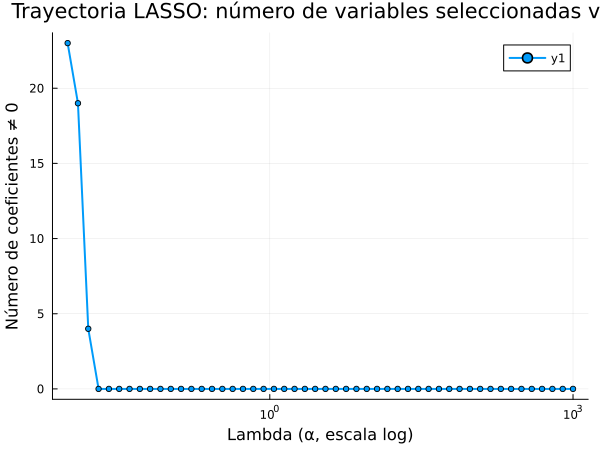

In [99]:
using GLMNet
using Plots

# Rango de lambda (más conservador para evitar problemas de convergencia)
lambdas = 10.0 .^ range(3, -2, length=50)  # de 1,000 a 0.01

nonzero_counts = []

for lam in lambdas
    try
        # Ajustar modelo LASSO con mayor tolerancia
        lasso = glmnet(X_train, y_train, alpha=1.0, lambda=[lam], 
                      tol=1e-4, maxit=100000)
        
        # Contar coeficientes no cero
        # lasso.betas es un vector cuando solo hay un lambda
        coefs = lasso.betas
        nonzero_count = sum(abs.(coefs) .> 1e-8)  # Umbral para considerar "cero"
        push!(nonzero_counts, nonzero_count)
    catch e
        # Si hay error, asignar 0
        push!(nonzero_counts, 0)
        println("Error con lambda=$lam: $e")
    end
end

# Plot
plot(lambdas, nonzero_counts, 
     marker=:circle,
     xscale=:log10,
     xlabel="Lambda (α, escala log)",
     ylabel="Número de coeficientes ≠ 0",
     title="Trayectoria LASSO: número de variables seleccionadas vs λ",
     grid=true,
     size=(600, 450),
     linewidth=2,
     markersize=3)